In [6]:
import logging
import sys

logger = logging.getLogger()
fileHandler = logging.FileHandler("logfile.log")
streamHandler = logging.StreamHandler(sys.stdout)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
streamHandler.setFormatter(formatter)
fileHandler.setFormatter(formatter)
logger.addHandler(streamHandler)
logger.addHandler(fileHandler)
logger.error("This is the first error")

2022-06-27 14:33:02,153 - root - ERROR - This is the first error
2022-06-27 14:33:02,153 - root - ERROR - This is the first error


In [2]:
ls

 dvd_builder.ipynb            pnl_and_volume_estimate.ipynb
 forecast_eve.ipynb           posttrade_analysis.ipynb
 hist_data_downloader.ipynb   test.ipynb
 load_saved_data.ipynb       'yield analyzer-Copy1.ipynb'
 logfile.log                 'yield analyzer.ipynb'


In [3]:
cat logfile.log

2022-06-23 15:14:18,936 - root - ERROR - This is the first error


In [27]:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib notebook

/tmp/ipykernel_100337/3845645374.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [43]:
import pandas as pd
import numpy as np

In [117]:
from valkyrie.securities import ROOT_PATH

In [147]:
fn = f'{ROOT_PATH}/sim_output/test_simout.h5'

In [148]:
df = pd.read_hdf(fn)

In [149]:
df['total_pnl'] = df.eval('pnl + pos_pnl')

<IPython.core.display.Javascript object>


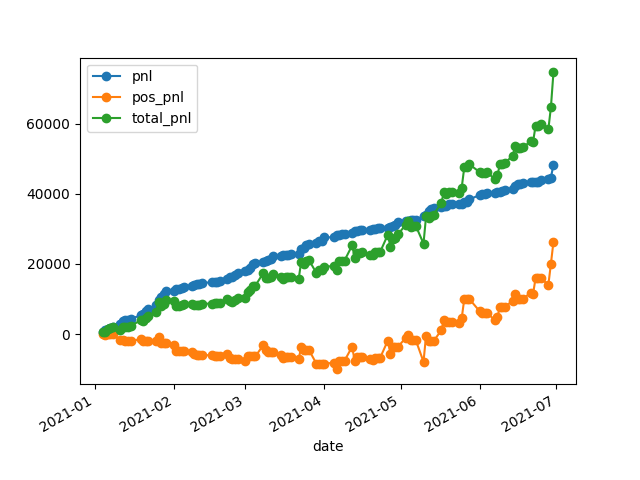

<AxesSubplot:xlabel='date'>

In [150]:
df.query('ticker == "total"')[['pnl','pos_pnl','total_pnl']].cumsum().plot(style='-o')

In [151]:
df.groupby('ticker')[['pnl','pos_pnl']].agg(['min','max','mean','median', win_ratio])

pnl                       ...     pos_pnl                 
         min      max        mean  ...        mean median win_ratio
ticker                             ...                             
AGNCM   0.00   875.90   82.422144  ...  -11.384322   -0.0  0.725806
AGNCN   0.00  2521.20  135.753288  ...  -18.777965    0.0  0.733871
AGNCO   0.00  1200.08  171.114355  ...  242.078387    0.0  0.693548
PFF     0.00     0.00    0.000000  ...    0.000000    0.0  1.000000
total   5.22  3677.56  389.289787  ...  211.916100    0.0  0.677419

[5 rows x 10 columns]

In [152]:
df

,ticker,pnl,cash,shares,abs_shares,edge,pos_pnl,pos,$pos,$pos_abs,$volume,sod_tv,eod_tv,sod_share,eod_share,total_pnl
date,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,PFF,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,37.945,0.0,0.0,0.00
2021-01-04 00:00:00-05:00,AGNCM,279.14,24799.59,-1007.0,1007.0,279.14,0.00,-1007.0,-24520.45,24520.45,24520.45,0.00,24.350,0.0,-1007.0,279.14
2021-01-04 00:00:00-05:00,AGNCN,192.57,8584.17,-333.0,1553.0,192.57,0.00,-333.0,-8391.60,8391.60,39135.60,0.00,25.200,0.0,-333.0,192.57
2021-01-04 00:00:00-05:00,AGNCO,268.68,-18302.32,758.0,2100.0,268.68,0.00,758.0,18571.00,18571.00,51450.00,0.00,24.500,0.0,758.0,268.68
2021-01-04 00:00:00-05:00,total,740.39,15081.44,-582.0,4660.0,740.39,0.00,-582.0,-14341.05,51483.05,115106.05,0.00,111.995,0.0,-582.0,740.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 00:00:00-04:00,PFF,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,39.25,39.305,0.0,0.0,0.00
2021-06-30 00:00:00-04:00,AGNCM,875.90,-42199.98,1636.0,1636.0,875.90,651.82,6650.0,175094.50,175094.50,43075.88,26.20,26.330,5014.0,6650.0,1527.72
2021-06-30 00:00:00-04:00,AGNCN,2521.20,129928.26,-4806.0,8404.0,2521.20,88.08,-7008.0,-185782.08,185782.08,222790.04,26.55,26.510,-2202.0,-7008.0,2609.28


In [100]:
df['date'] = df.index

In [102]:
df.columns

Index(['ticker', 'pnl', 'cash', 'shares', 'abs_shares', 'edge', 'pos_pnl',
       'pos', '$pos', '$pos_abs', '$volume', 'sod_tv', 'eod_tv', 'sod_share',
       'eod_share', 'total_pnl', 'date'],
      dtype='object')

In [103]:
z = df.set_index('ticker').groupby(level=0)[['pnl','pos_pnl']].apply(lambda x : x.cumsum())

In [114]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')

In [115]:
type(nyse
    )

pandas_market_calendars.exchange_calendar_nyse.NYSEExchangeCalendar

In [116]:
nyse.schedule(start_date='20210101', end_date='20210106').index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06'], dtype='datetime64[ns]', freq=None)

In [123]:
from sklearn.model_selection import ParameterGrid
param_grid = {'a': [1, 2], 'b': [True, False]}

In [124]:
param_grid

{'a': [1, 2], 'b': [True, False]}

In [125]:
list(ParameterGrid(param_grid)) 

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [126]:
x= {'a':{'b':3}}


In [127]:
type({})

dict

In [128]:

def fu(p, x):
    for k, v in x:
        if type(v) is not type({}):
            p[k] = v
        else:
            fu(p[k], x[k])

In [132]:
p={'a':{'b':3,'c':4}}

In [145]:
def deepUpate(m:dict, key_str:str, v, delimiter=":"):
    m = m.copy()
    c = m
    ks = key_str.split(delimiter)
    for k in ks[0:-1]:
        c = c[k]
    c[ks[-1]] = v
    return m

In [146]:
deepUpate(p, 'a:c',[23,3])

{'a': {'b': 3, 'c': [23, 3]}}

In [142]:
p

{'a': {'b': 3, 'c': [23, 3]}}